In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx',  parse_dates=['InvoiceDate'])
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
df.shape

(541909, 8)

In [4]:
df.describe().round(2)

Quantity  UnitPrice  CustomerID
count  541909.00  541909.00   406829.00
mean        9.55       4.61    15287.69
std       218.08      96.76     1713.60
min    -80995.00  -11062.06    12346.00
25%         1.00       1.25    13953.00
50%         3.00       2.08    15152.00
75%        10.00       4.13    16791.00
max     80995.00   38970.00    18287.00

In [5]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df['Description'] = df['Description'].str.strip()

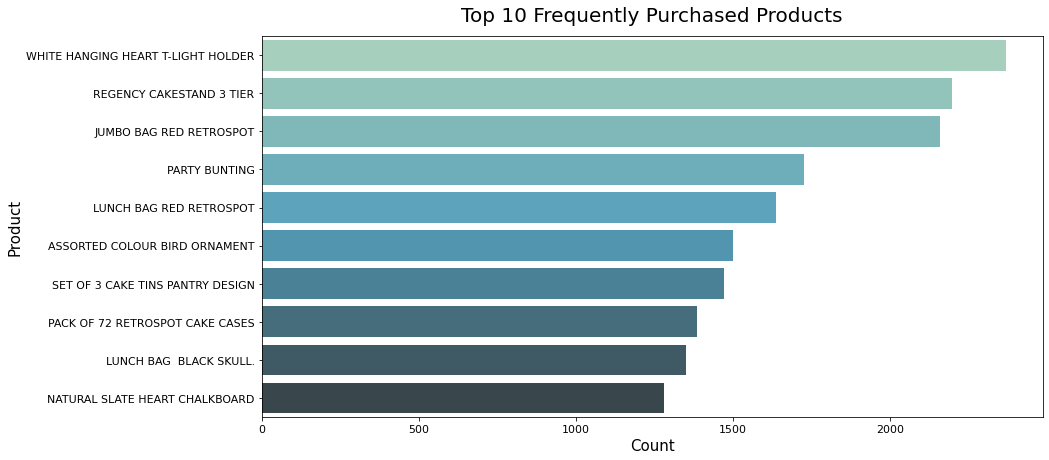

In [6]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = df['Description'], 
                   order = df["Description"].value_counts().iloc[:10].index, 
                   palette = "GnBu_d")
ax.set_title("Top 10 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Count", size = 15)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

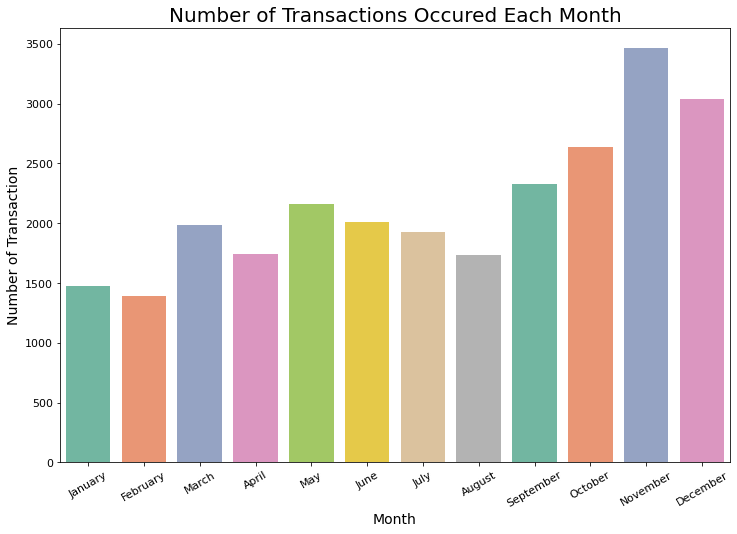

In [7]:
order_month = df.groupby(df['InvoiceDate'].dt.month)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_month.reset_index(), palette = "Set2")
ax.set_title('Number of Transactions Occured Each Month', size = 20)
ax.set_xlabel('Month', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 30)
plt.show()

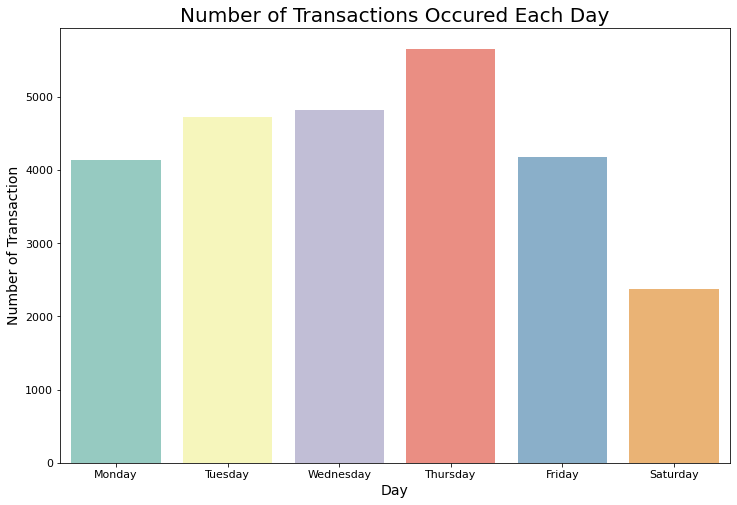

In [8]:
order_day = df.groupby(df['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_day.reset_index(), palette = "Set3")
ax.set_title('Number of Transactions Occured Each Day', size = 20)
ax.set_xlabel('Day', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

In [9]:
df.sort_values('InvoiceNo', ascending=False)

InvoiceNo StockCode                          Description  Quantity  \
541717   C581569     20979        36 PENCILS TUBE RED RETROSPOT        -5   
541716   C581569     84978     HANGING HEART JAR T-LIGHT HOLDER        -1   
541715   C581568     21258           VICTORIAN SEWING BOX LARGE        -5   
541541   C581499         M                               Manual        -1   
540448   C581490     22178      VICTORIAN GLASS HANGING T-LIGHT       -12   
...          ...       ...                                  ...       ...   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365     71053                  WHITE METAL LANTERN         6   
5         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   

               InvoiceDate  UnitPrice  CustomerID         Country  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
540448 2011-12-09 09:57:00       1.95     14397.0  United Kingdom  
...                    ...        ...         ...             ...  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  

[541909 rows x 8 columns]

In [10]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [11]:
df.shape

(532621, 8)

In [12]:
df = df.dropna(subset = ['CustomerID', 'Description'])

In [13]:
df.shape

(397924, 8)

In [14]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [15]:
order=pd.DataFrame()
order['count'] = df["Description"].value_counts()

In [16]:
print('Top 10 frequently purchased products: ')
order[:10]

Top 10 frequently purchased products: 


count
WHITE HANGING HEART T-LIGHT HOLDER   2028
REGENCY CAKESTAND 3 TIER             1724
JUMBO BAG RED RETROSPOT              1618
ASSORTED COLOUR BIRD ORNAMENT        1408
PARTY BUNTING                        1397
LUNCH BAG RED RETROSPOT              1316
SET OF 3 CAKE TINS PANTRY DESIGN     1159
LUNCH BAG  BLACK SKULL.              1105
POSTAGE                              1099
PACK OF 72 RETROSPOT CAKE CASES      1068

In [17]:
df['Description'].unique().size

3866

In [18]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df_topprice = pd.pivot_table(df, index='CustomerID', values='TotalPrice', aggfunc=np.sum)
print('Top 10 customers who spent more money in the store:')
df_topprice.sort_values('TotalPrice', ascending=False)[:10]

Top 10 customers who spent more money in the store:


TotalPrice
CustomerID            
14646        280206.02
18102        259657.30
17450        194550.79
16446        168472.50
14911        143825.06
12415        124914.53
14156        117379.63
17511         91062.38
16029         81024.84
12346         77183.60

In [19]:
df_topcustomer = pd.pivot_table(df, index='CustomerID', values='InvoiceNo', aggfunc=pd.Series.nunique)
print('Top 10 most customers who frequently shop at Online Retail:')
df_topcustomer.sort_values('InvoiceNo', ascending=False)[:10]

Top 10 most customers who frequently shop at Online Retail:


InvoiceNo
CustomerID           
12748             210
14911             201
17841             124
13089              97
14606              93
15311              91
12971              86
14646              74
16029              63
13408              62

In [20]:
df['InvoiceMonth']=df['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

In [21]:
df['FirstpurchaseMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [22]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   
...                    ...        ...         ...             ...         ...   
541904 2011-12-09 12:50:00       0.85       12680          France       10.20   
541905 2011-12-09 12:50:00       2.10       12680          France       12.60   
541906 2011-12-09 12:50:00       4.15       12680          France       16.60   
541907 2011-12-09 12:50:00       4.15       12680          France       16.60   
541908 2011-12-09 12:50:00       4.95       12680          France       14.85   

       InvoiceMonth FirstpurchaseMonth  
0        2010-12-01         2010-12-01  
1        2010-12-01         2010-12-01  
2        2010-12-01         2010-12-01  
3        2010-12-01         2010-12-01  
4        2010-12-01         2010-12-01  
...             ...                ...  
541904   2011-12-01         2011-08-01  
541905   2011-12-01         2011-08-01  
541906   2011-12-01         2011-08-01  
541907   2011-12-01         2011-08-01  
541908   2011-12-01         2011-08-01  

[397924 rows x 11 columns]

In [23]:
def date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

invoice_year, invoice_month, _ = date(df, 'InvoiceMonth')
fm_year, fm_month, _ = date(df, 'FirstpurchaseMonth')

diff_year = invoice_year - fm_year
diff_month = invoice_month - fm_month

df['Number_of_months'] = diff_year*12 + diff_month + 1

In [24]:
df1 = df.groupby(['FirstpurchaseMonth', 'Number_of_months'])['CustomerID'].apply(pd.Series.nunique)
df1 = df1.reset_index()
df2 = df1.pivot(index='FirstpurchaseMonth', columns='Number_of_months', values='CustomerID')
df2

Number_of_months       1      2      3      4      5      6      7      8   \
FirstpurchaseMonth                                                           
2010-12-01          885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01          417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01          380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01          452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01          300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01          284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01          242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01          188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01          169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01          299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01          358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01          324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01           41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Number_of_months       9      10     11     12     13  
FirstpurchaseMonth                                     
2010-12-01          313.0  350.0  331.0  445.0  235.0  
2011-01-01          125.0  136.0  152.0   49.0    NaN  
2011-02-01           94.0  116.0   26.0    NaN    NaN  
2011-03-01          126.0   39.0    NaN    NaN    NaN  
2011-04-01           22.0    NaN    NaN    NaN    NaN  
2011-05-01            NaN    NaN    NaN    NaN    NaN  
2011-06-01            NaN    NaN    NaN    NaN    NaN  
2011-07-01            NaN    NaN    NaN    NaN    NaN  
2011-08-01            NaN    NaN    NaN    NaN    NaN  
2011-09-01            NaN    NaN    NaN    NaN    NaN  
2011-10-01            NaN    NaN    NaN    NaN    NaN  
2011-11-01            NaN    NaN    NaN    NaN    NaN  
2011-12-01            NaN    NaN    NaN    NaN    NaN

In [25]:
retention = df2.divide(df2.iloc[:,0], axis = 0)
retention.index = retention.index.strftime('%Y-%m')

In [26]:
retention

Number_of_months     1         2         3         4         5         6   \
FirstpurchaseMonth                                                          
2010-12             1.0  0.366102  0.323164  0.384181  0.362712  0.397740   
2011-01             1.0  0.220624  0.266187  0.230216  0.321343  0.287770   
2011-02             1.0  0.186842  0.186842  0.284211  0.271053  0.247368   
2011-03             1.0  0.150442  0.252212  0.199115  0.223451  0.168142   
2011-04             1.0  0.213333  0.203333  0.210000  0.196667  0.226667   
2011-05             1.0  0.190141  0.172535  0.172535  0.207746  0.232394   
2011-06             1.0  0.173554  0.157025  0.264463  0.231405  0.334711   
2011-07             1.0  0.180851  0.207447  0.223404  0.271277  0.111702   
2011-08             1.0  0.207101  0.248521  0.242604  0.124260       NaN   
2011-09             1.0  0.234114  0.301003  0.113712       NaN       NaN   
2011-10             1.0  0.240223  0.114525       NaN       NaN       NaN   
2011-11             1.0  0.111111       NaN       NaN       NaN       NaN   
2011-12             1.0       NaN       NaN       NaN       NaN       NaN   

Number_of_months          7         8         9         10        11  \
FirstpurchaseMonth                                                     
2010-12             0.362712  0.349153  0.353672  0.395480  0.374011   
2011-01             0.247002  0.242206  0.299760  0.326139  0.364508   
2011-02             0.252632  0.278947  0.247368  0.305263  0.068421   
2011-03             0.267699  0.230088  0.278761  0.086283       NaN   
2011-04             0.216667  0.260000  0.073333       NaN       NaN   
2011-05             0.264085  0.095070       NaN       NaN       NaN   
2011-06             0.095041       NaN       NaN       NaN       NaN   
2011-07                  NaN       NaN       NaN       NaN       NaN   
2011-08                  NaN       NaN       NaN       NaN       NaN   
2011-09                  NaN       NaN       NaN       NaN       NaN   
2011-10                  NaN       NaN       NaN       NaN       NaN   
2011-11                  NaN       NaN       NaN       NaN       NaN   
2011-12                  NaN       NaN       NaN       NaN       NaN   

Number_of_months          12        13  
FirstpurchaseMonth                      
2010-12             0.502825  0.265537  
2011-01             0.117506       NaN  
2011-02                  NaN       NaN  
2011-03                  NaN       NaN  
2011-04                  NaN       NaN  
2011-05                  NaN       NaN  
2011-06                  NaN       NaN  
2011-07                  NaN       NaN  
2011-08                  NaN       NaN  
2011-09                  NaN       NaN  
2011-10                  NaN       NaN  
2011-11                  NaN       NaN  
2011-12                  NaN       NaN

# RFM Analysis

In [27]:
analysis_date = max(df['InvoiceDate']) + dt.timedelta(days= 1)

In [28]:
rfm_customer = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})
rfm_customer.rename(columns= {'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalPrice':'Monetary'}, inplace = True)
rfm_customer

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2        182   4310.00
12348            75         31   1797.24
12349            19         73   1757.55
12350           310         17    334.40
...             ...        ...       ...
18280           278         10    180.60
18281           181          7     80.82
18282             8         12    178.05
18283             4        756   2094.88
18287            43         70   1837.28

[4339 rows x 3 columns]

In [29]:
#1 is the best and 4 is the worst
recency_labels  = range(1,5) 
frequency_labels = range(4,0,-1) 
monetary_labels = range(4,0,-1)

recency_quartiles = pd.qcut(rfm_customer['Recency'], q=4, labels=recency_labels)
frequency_quartiles = pd.qcut(rfm_customer['Frequency'], q=4, labels=frequency_labels)
monetary_quartiles = pd.qcut(rfm_customer['Monetary'], q=4, labels=monetary_labels)

rfm_customer = rfm_customer.assign(R = recency_quartiles.values, F = frequency_quartiles.values, M = monetary_quartiles.values)

rfm_customer

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346           326          1  77183.60  4  4  1
12347             2        182   4310.00  1  1  1
12348            75         31   1797.24  3  3  1
12349            19         73   1757.55  2  2  1
12350           310         17    334.40  4  4  3
...             ...        ...       ... .. .. ..
18280           278         10    180.60  4  4  4
18281           181          7     80.82  4  4  4
18282             8         12    178.05  1  4  4
18283             4        756   2094.88  1  1  1
18287            43         70   1837.28  2  2  1

[4339 rows x 6 columns]

In [30]:
rfm_customer['RFM_metric']=rfm_customer[['R','F','M']].apply(lambda x: x['R']*100 + x['F']*10 + x['M']*1,axis=1)
rfm_customer['RFM_Score'] = rfm_customer[['R', 'F', 'M']].sum(axis=1)

In [31]:
rfm_customer.head()

Recency  Frequency  Monetary  R  F  M  RFM_metric  RFM_Score
CustomerID                                                              
12346           326          1  77183.60  4  4  1         441          9
12347             2        182   4310.00  1  1  1         111          3
12348            75         31   1797.24  3  3  1         331          7
12349            19         73   1757.55  2  2  1         221          5
12350           310         17    334.40  4  4  3         443         11

In [32]:
rfm_count=rfm_customer.groupby('RFM_metric').size().sort_values(ascending=False)

In [33]:
rfm_count=pd.DataFrame(rfm_count,columns=['count'])
a=rfm_count['count'].sum()
rfm_count['percentage']=rfm_count['count'].apply(lambda x:x/a)
rfm_count

count  percentage
RFM_metric                   
111           447    0.103019
444           384    0.088500
211           217    0.050012
433           206    0.047476
344           179    0.041254
...           ...         ...
241             7    0.001613
141             6    0.001383
431             5    0.001152
413             4    0.000922
114             3    0.000691

[61 rows x 2 columns]

In [34]:
rfm_customer.groupby('RFM_Score').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(2)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3            7.28    374.49  9319.21   447
4           21.11    187.70  4083.22   392
5           32.08    112.30  2049.43   426
6           45.96     79.97  1801.35   417
7           64.57     56.82   994.15   454
8           79.13     38.51   755.45   459
9           96.30     27.87   823.96   461
10         154.34     21.45   368.50   516
11         175.67     13.63   239.60   383
12         260.76      8.21   158.92   384

# Customer Segmentation 

In [35]:
recencyskew=rfm_customer['Recency'].skew()
frequencyskew=rfm_customer['Frequency'].skew()
Monetaryskew=rfm_customer['Monetary'].skew()
print('Skewness value of data {}: {}'.format('Recency', recencyskew))
print('Skewness value of data {}: {}'.format('Frequency', frequencyskew))
print('Skewness value of data {}: {}'.format('Recency', Monetaryskew))

Skewness value of data Recency: 1.2463568823921842
Skewness value of data Frequency: 18.106242903118684
Skewness value of data Recency: 19.326985305561827


C:\Users\skond\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


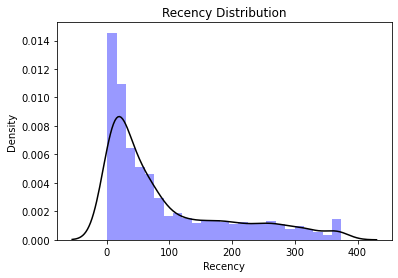

C:\Users\skond\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


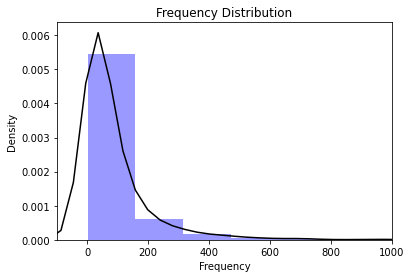

C:\Users\skond\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


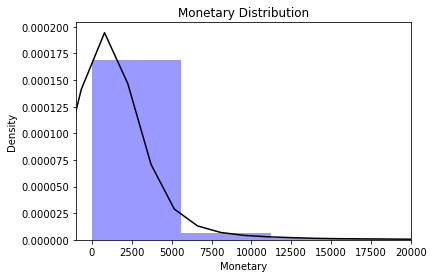

In [36]:
sns.distplot(rfm_customer['Recency'], color = 'blue', kde_kws={"color": "k"})
plt.title('{} Distribution'.format('Recency'))

plt.show()

sns.distplot(rfm_customer['Frequency'], color = 'blue', kde_kws={"color": "k"})
plt.title('{} Distribution'.format('Frequency'))
plt.xlim([-100,1000])
plt.show()

sns.distplot(rfm_customer['Monetary'], color = 'blue', kde_kws={"color": "k"})
plt.title('{} Distribution'.format('Monetary'))
plt.xlim([-1000,20000])

plt.show()

In [37]:
rfm_norm = rfm_customer[['Recency','Frequency','Monetary']]
power = PowerTransformer().fit(rfm_norm)
rfm_transform =power.transform(rfm_norm)

scaler = StandardScaler().fit(rfm_transform)
rfm_transform = scaler.transform(rfm_transform)

rfm_transform =pd.DataFrame(rfm_transform, index=rfm_norm.index, columns=rfm_norm.columns)
print('These are the mean value after data transformation:')
rfm_transform.describe()

These are the mean value after data transformation:


Recency     Frequency      Monetary
count  4.339000e+03  4.339000e+03  4.339000e+03
mean  -3.193267e-17  1.391937e-17 -3.275145e-17
std    1.000115e+00  1.000115e+00  1.000115e+00
min   -2.023615e+00 -2.420116e+00 -6.771115e+00
25%   -7.262454e-01 -6.778752e-01 -6.640781e-01
50%   -7.919785e-04 -1.754355e-03 -1.423703e-02
75%    8.380272e-01  7.009493e-01  6.862765e-01
max    1.755177e+00  4.225204e+00  3.885827e+00

C:\Users\skond\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


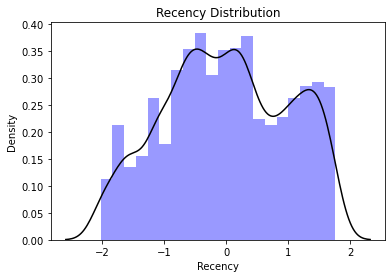

C:\Users\skond\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


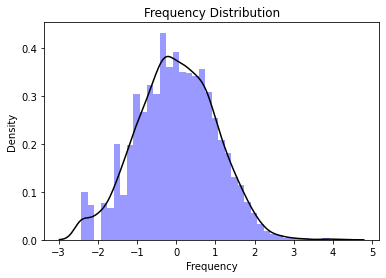

C:\Users\skond\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


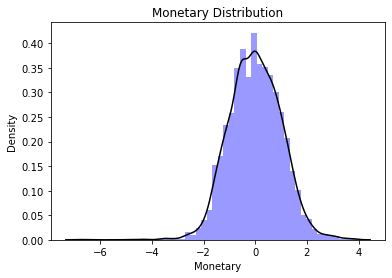

In [38]:
sns.distplot(rfm_transform['Recency'], color = 'blue', kde_kws={"color": "k"})
plt.title('{} Distribution'.format('Recency'))
plt.show()

sns.distplot(rfm_transform['Frequency'], color = 'blue', kde_kws={"color": "k"})
plt.title('{} Distribution'.format('Frequency'))
plt.show()

sns.distplot(rfm_transform['Monetary'], color = 'blue', kde_kws={"color": "k"})
plt.title('{} Distribution'.format('Monetary'))
plt.show()

In [39]:
SSE=[]
number_clusters = 10

for i in range(1,number_clusters+1):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(rfm_transform)
    SSE.append(kmeans.inertia_)

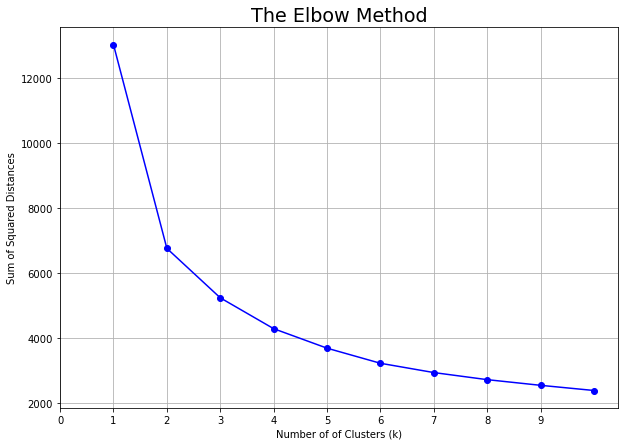

In [40]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 7)
plt.rcParams['font.size']=16
plt.plot(range(1,11), SSE, 'o-', color = 'b')
plt.xticks(np.arange(0, 10, 1.0))
plt.title('The Elbow Method')
plt.xlabel('Number of of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.396689892885645
For n_clusters = 3 The average silhouette_score is : 0.29935070361583976
For n_clusters = 4 The average silhouette_score is : 0.30417720917225627
For n_clusters = 5 The average silhouette_score is : 0.2788174901490917
For n_clusters = 6 The average silhouette_score is : 0.277274890389003


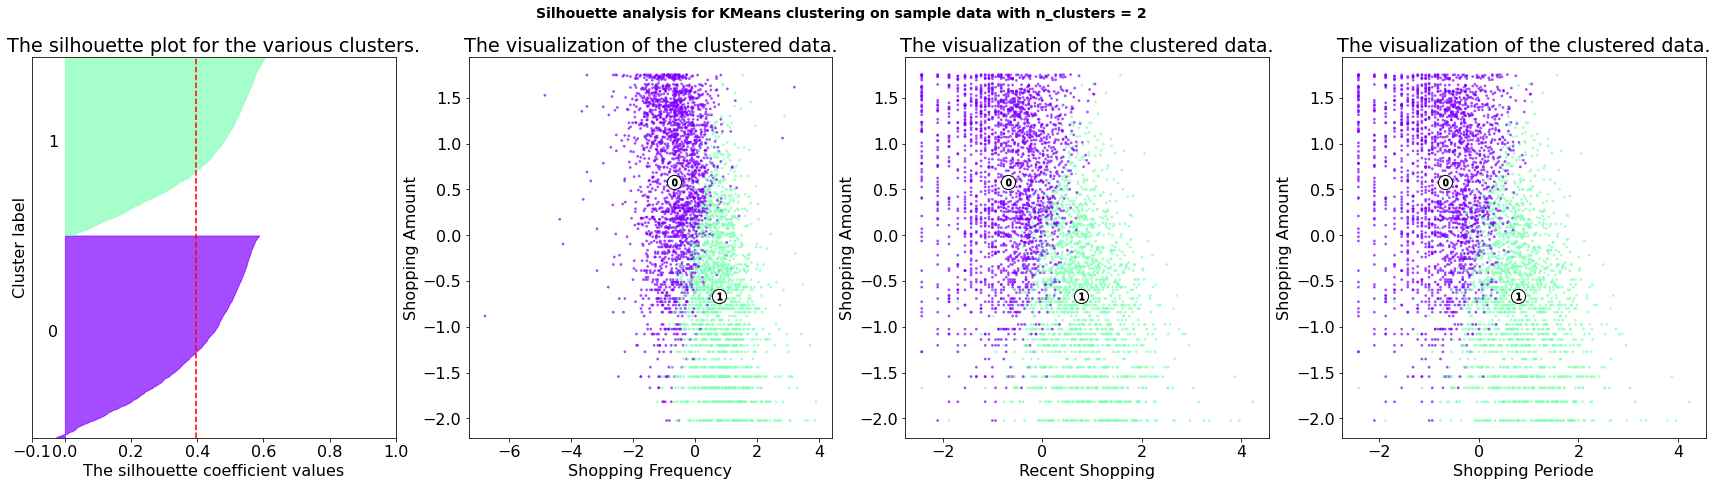

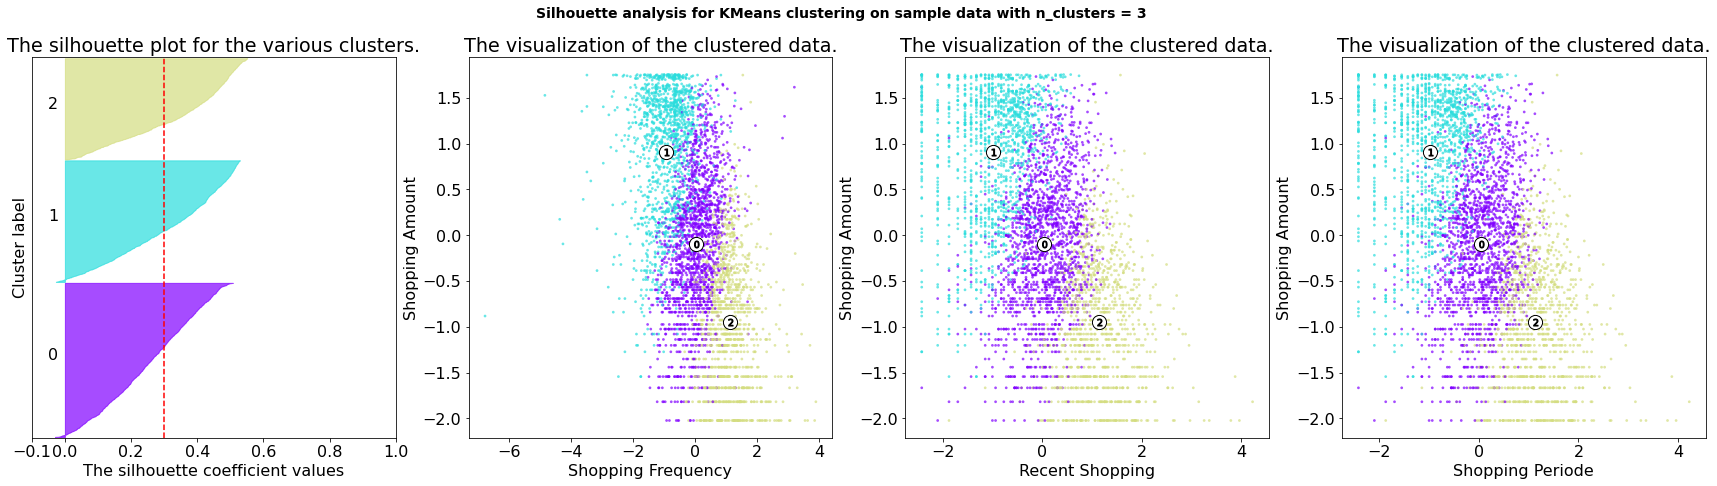

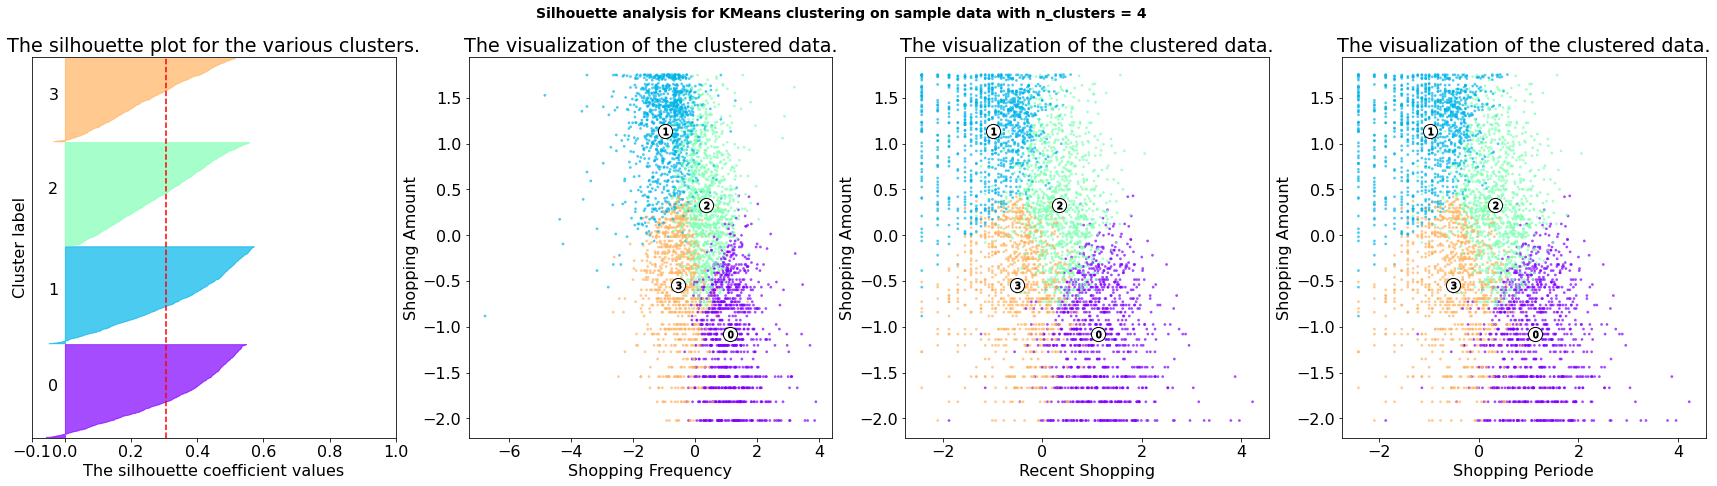

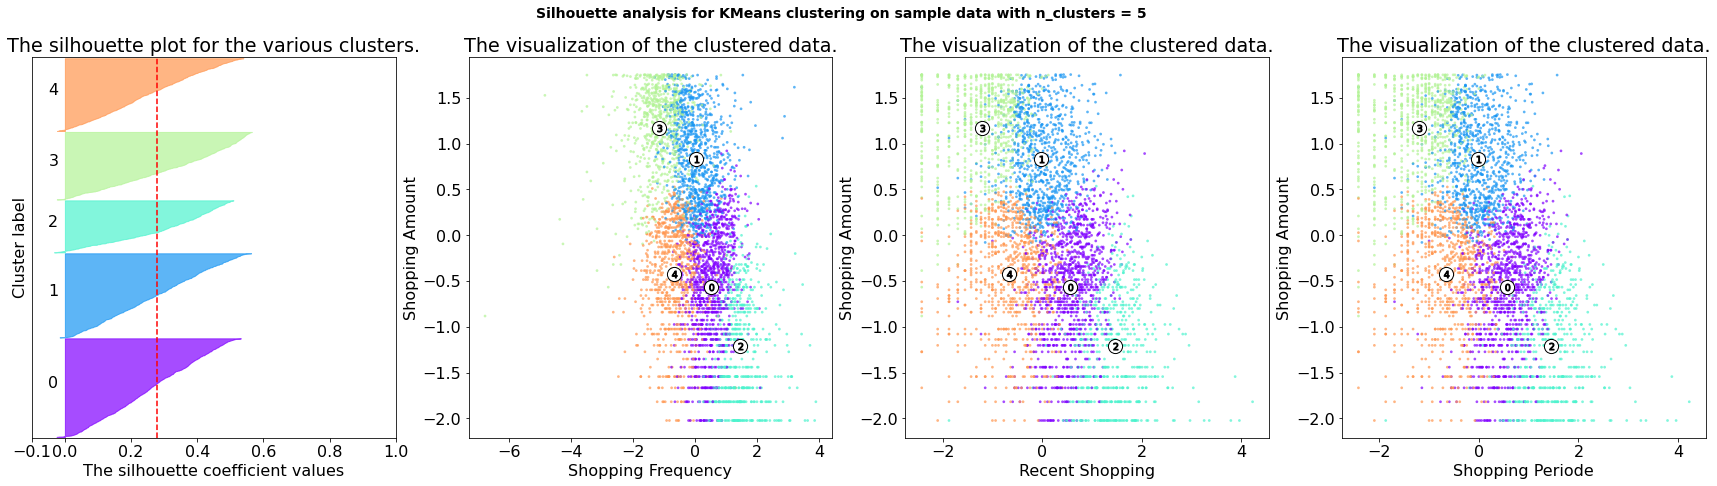

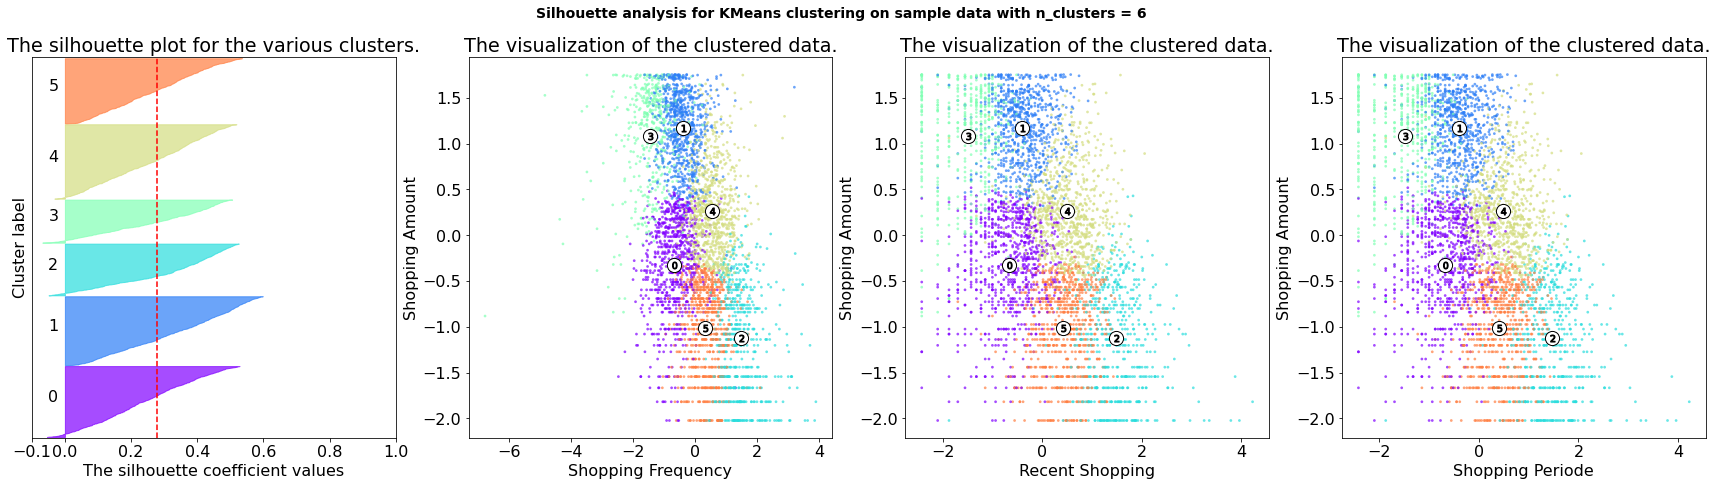

In [41]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_size_inches(30, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(rfm_transform) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(rfm_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(rfm_transform, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm_transform, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.rainbow(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(rfm_transform['Monetary'], rfm_transform['Recency'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Shopping Frequency")
    ax2.set_ylabel("Shopping Amount")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
        # 3nd Plot showing the actual clusters formed
    colors = cm.rainbow(cluster_labels.astype(float) / n_clusters)
    ax3.scatter(rfm_transform['Frequency'], rfm_transform['Recency'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax3.scatter(centers[:, 1], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax3.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax3.set_title("The visualization of the clustered data.")
    ax3.set_xlabel("Recent Shopping")
    ax3.set_ylabel("Shopping Amount")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

    # 4nd Plot showing the actual clusters formed
    colors = cm.rainbow(cluster_labels.astype(float) / n_clusters)
    ax4.scatter(rfm_transform['Frequency'], rfm_transform['Recency'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax4.scatter(centers[:, 1], centers[:, 0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax4.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax4.set_title("The visualization of the clustered data.")
    ax4.set_xlabel("Shopping Periode")
    ax4.set_ylabel("Shopping Amount")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


plt.show()

In [42]:
model = KMeans(n_clusters=4,init='k-means++',max_iter=300, n_init=10, random_state=0)

#fit the data
model_kmeans = model.fit(rfm_transform)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model_kmeans.labels_

centers = model_kmeans.cluster_centers_

#Append labels/clusters to scaled and original dataframe
rfm_customer['Cluster'] = labels
clusters_seg = pd.DataFrame(rfm_transform,columns=['Recency','Frequency','Monetary'])
clusters_seg['Cluster'] = labels+1

clusters = []

for i in range(0,4):
    clusters.append(rfm_customer[rfm_customer['Cluster']==i])

values = power.inverse_transform(scaler.inverse_transform(centers))

for i in range(0,4):
    print('-----CLUSTER {}-----'.format(i+1))
    print('Number of Customers: {}'.format(clusters[i].shape[0]))
    print('(Recency)Last Day Shopping: {:4.0f}'.format(values[i][0]))
    print('(Frec)Purchases Frequency : {:4.0f}'.format(values[i][1]))
    print('(Monetary)Total purchases: £{:6.2f}\n'.format(values[i][2]))
    

-----CLUSTER 1-----
Number of Customers: 962
(Recency)Last Day Shopping:   24
(Frec)Purchases Frequency :   21
(Monetary)Total purchases: £347.56

-----CLUSTER 2-----
Number of Customers: 1195
(Recency)Last Day Shopping:   78
(Frec)Purchases Frequency :   62
(Monetary)Total purchases: £1069.15

-----CLUSTER 3-----
Number of Customers: 1067
(Recency)Last Day Shopping:   10
(Frec)Purchases Frequency :  171
(Monetary)Total purchases: £2979.90

-----CLUSTER 4-----
Number of Customers: 1115
(Recency)Last Day Shopping:  199
(Frec)Purchases Frequency :   11
(Monetary)Total purchases: £217.98



In [43]:
rfm_transform['Cluster'] = model_kmeans.labels_

In [44]:
rfm_transform

Recency  Frequency  Monetary  Cluster
CustomerID                                        
12346       1.617262  -2.420116  3.193082        1
12347      -1.818927   1.178407  1.377477        2
12348       0.300127  -0.219010  0.745038        1
12349      -0.691692   0.451547  0.728345        2
12350       1.567401  -0.677875 -0.592290        3
...              ...        ...       ...      ...
18280       1.460667  -1.069762 -1.124451        3
18281       1.056042  -1.322743 -1.853628        3
18282      -1.202619  -0.936920 -1.137008        0
18283      -1.544053   2.323804  0.858842        2
18287      -0.128304   0.418390  0.761481        1

[4339 rows x 4 columns]

In [46]:
import plotly.express as px

fig = px.parallel_coordinates(rfm_transform, color="Cluster",
                              dimensions=['Recency', 'Frequency', 'Monetary'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

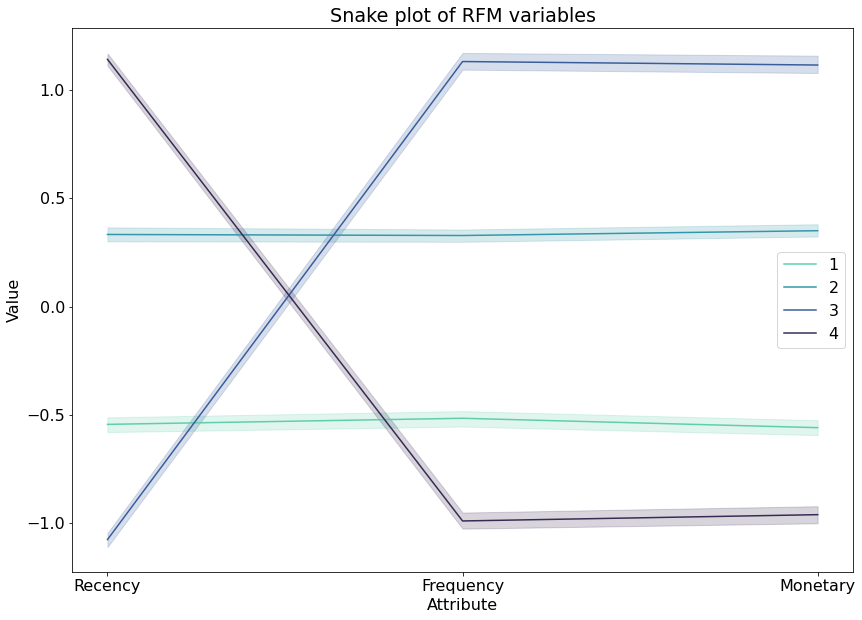

In [47]:
data = pd.melt(rfm_transform.reset_index(), id_vars=['CustomerID','Cluster'], value_vars=['Recency','Frequency','Monetary'], var_name='Attribute', value_name='Value')
plt.figure(figsize=(14,10))
plt.title('Snake plot of RFM variables')
palette = sns.color_palette("mako_r", 4)
ax = sns.lineplot(x='Attribute', y='Value', hue='Cluster',palette=palette, data=data, sort=False)
ax.legend(['1','2','3','4'])
plt.show()

# Market Basket Analysis

In [48]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                          0.0                         0.0   
536366                          0.0                         0.0   
536367                          0.0                         0.0   
536368                          0.0                         0.0   
536369                          0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                             0.0                        0.0   
536366                             0.0                        0.0   
536367                             0.0                        0.0   
536368                             0.0                        0.0   
536369                             0.0                        0.0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                0.0                               0.0   
536366                                0.0                               0.0   
536367                                0.0                               0.0   
536368                                0.0                               0.0   
536369                                0.0                               0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                   0.0                            0.0   
536366                                   0.0                            0.0   
536367                                   0.0                            0.0   
536368                                   0.0                            0.0   
536369                                   0.0                            0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365                                       0.0                          0.0   
536366                                       0.0                          0.0   
536367                                       0.0                          0.0   
536368                                       0.0                          0.0   
536369                                       0.0                          0.0   

Description  ...  ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH  \
InvoiceNo    ...                                                        
536365       ...                       0.0                        0.0   
536366       ...                       0.0                        0.0   
536367       ...                       0.0                        0.0   
536368       ...                       0.0                        0.0   
536369       ...                       0.0                        0.0   

Description  ZINC SWEETHEART WIRE LETTER RACK  ZINC T-LIGHT HOLDER STAR LARGE  \
InvoiceNo                                                                       
536365                                    0.0                             0.0   
536366                                    0.0                             0.0   
536367                                    0.0                             0.0   
536368                                    0.0                             0.0   
536369                                    0.0                             0.0   

Description  ZINC T-LIGHT HOLDER STARS LARGE  ZINC T-LIGHT HOLDER STARS SMALL  \
InvoiceNo                                                                       
536365                                   0.0                              0.0   
536366                                   0.0   

In [50]:
basket_sets = basket.applymap(lambda x:0 if x<=0 else 1)
basket_sets.drop('POSTAGE',inplace=True, axis=1)

In [51]:
basket_sets

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   
...                             ...                         ...   
581583                            0                           0   
581584                            0                           0   
581585                            0                           0   
581586                            0                           0   
581587                            0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                          0   
...                                ...                        ...   
581583                               0                          0   
581584                               0                          0   
581585                               0                          0   
581586                               0                          0   
581587                               0                          0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                  0                                 0   
536366                                  0                                 0   
536367                                  0                                 0   
536368                                  0                                 0   
536369                                  0                                 0   
...                                   ...                               ...   
581583                                  0                                 0   
581584                                  0                                 0   
581585                                  0                                 0   
581586                                  0                                 0   
581587                                  0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                              0   
536368                                     0                              0   
536369                                     0                              0   
...                                      ...                            ...   
581583                                     0                              0   
581584                                     0                              0   
581585                                     0                              0   
581586                                     0                              0   
581587                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365      

In [52]:
x = 300/18536
x

0.016184721622788088

In [53]:
minTransaction = 300
totalTransactions = len(basket_sets.index)
print(totalTransactions)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

18536
number of baskets for analysis is 18536
minimum support value is  1.6185 %


In [54]:
frequent_itemsets = fpgrowth(basket_sets, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

support
count  383.000000
mean     0.026144
std      0.011771
min      0.016293
25%      0.018370
50%      0.022443
75%      0.028836
max      0.106334

In [55]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

antecedents  \
108  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
106  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
89   (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
101                   (PINK REGENCY TEACUP AND SAUCER)   
104                   (PINK REGENCY TEACUP AND SAUCER)   
84                   (GREEN REGENCY TEACUP AND SAUCER)   
90   (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...   
94                (WOODEN STAR CHRISTMAS SCANDINAVIAN)   
97                        (BAKING SET SPACEBOY DESIGN)   
143                (GARDENERS KNEELING PAD CUP OF TEA)   

                               consequents  antecedent support  \
108      (GREEN REGENCY TEACUP AND SAUCER)            0.023522   
106      (ROSES REGENCY TEACUP AND SAUCER)            0.024817   
89       (ROSES REGENCY TEACUP AND SAUCER)            0.020177   
101      (GREEN REGENCY TEACUP AND SAUCER)            0.029996   
104      (ROSES REGENCY TEACUP AND SAUCER)            0.029996   
84       (ROSES REGENCY TEACUP AND SAUCER)            0.037279   
90       (GREEN REGENCY TEACUP AND SAUCER)            0.022659   
94   (WOODEN HEART CHRISTMAS SCANDINAVIAN)            0.023360   
97          (BAKING SET 9 PIECE RETROSPOT)            0.022874   
143     (GARDENERS KNEELING PAD KEEP CALM)            0.034258   

     consequent support   support  confidence       lift  leverage  conviction  
108            0.037279  0.021040    0.894495  23.994742  0.020163    9.124923  
106            0.042242  0.021040    0.847826  20.070631  0.019992    6.293837  
89             0.042242  0.016832    0.834225  19.748643  0.015980    5.777443  
101            0.037279  0.024817    0.827338  22.193256  0.023698    5.575760  
104            0.042242  0.023522    0.784173  18.563760  0.022255    4.437611  
84             0.042242  0.029186    0.782923  18.534184  0.027612    4.412071  
90             0.037279  0.016832    0.742857  19.927062  0.015987    3.743916  
94             0.024978  0.017210    0.736721  29.494281  0.016626    3.703371  
97             0.046073  0.016778    0.733491  15.920353  0.015724    3.579339  
143            0.040785  0.024978    0.729134  17.877282  0.023581    3.541286

In [56]:
df1 = df.groupby('InvoiceNo')['Description'].apply(list).reset_index(name='item')

In [57]:
df1

InvoiceNo                                               item
0        536365  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
1        536366  [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
2        536367  [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
3        536368  [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
4        536369                         [BATH BUILDING BLOCK WORD]
...         ...                                                ...
18531    581583  [LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...
18532    581584  [RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...
18533    581585  [BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...
18534    581586  [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3...
18535    581587  [CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...

[18536 rows x 2 columns]

In [58]:
df2 = pd.DataFrame(df1.item.tolist(), index= df1.index,)

In [59]:
df2

0                                 1    \
0       WHITE HANGING HEART T-LIGHT HOLDER               WHITE METAL LANTERN   
1                   HAND WARMER UNION JACK         HAND WARMER RED POLKA DOT   
2            ASSORTED COLOUR BIRD ORNAMENT         POPPY'S PLAYHOUSE BEDROOM   
3                 JAM MAKING SET WITH JARS       RED COAT RACK PARIS FASHION   
4                 BATH BUILDING BLOCK WORD                              None   
...                                    ...                               ...   
18531              LUNCH BAG RED RETROSPOT   6 CHOCOLATE LOVE HEART T-LIGHTS   
18532     RED FLOCK LOVE HEART PHOTO FRAME   6 CHOCOLATE LOVE HEART T-LIGHTS   
18533       BLACK TEA TOWEL CLASSIC DESIGN      ASSORTED BOTTLE TOP  MAGNETS   
18534  LARGE CAKE STAND  HANGING STRAWBERY  SET OF 3 HANGING OWLS OLLIE BEAK   
18535              CIRCUS PARADE LUNCH BOX     PLASTERS IN TIN CIRCUS PARADE   

                                   2                                    3    \
0       CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                                 None                                 None   
2            POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3       YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                                 None                                 None   
...                                ...                                  ...   
18531                             None                                 None   
18532                             None                                 None   
18533  VICTORIAN GLASS HANGING T-LIGHT       EMBOSSED GLASS TEALIGHT HOLDER   
18534    RED RETROSPOT ROUND CAKE TINS                DOORMAT RED RETROSPOT   
18535        PLASTERS IN TIN STRONGMAN            ALARM CLOCK BAKELIKE PINK   

                                    4                                   5    \
0        RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTING BOXES   
1                                  None                                None   
2                IVORY KNITTED MUG COSY  BOX OF 6 ASSORTED COLOUR TEASPOONS   
3                                  None                                None   
4                                  None                                None   
...                                 ...                                 ...   
18531                              None                                None   
18532                              None                                None   
18533  ZINC WILLIE WINKIE  CANDLE STICK                  RABBIT NIGHT LIGHT   
18534                              None                                None   
18535          ALARM CLOCK BAKELIKE RED          ALARM CLOCK BAKELIKE GREEN   

                                     6                                   7    \
0      GLASS STAR FROSTED T-LIGHT HOLDER                                None   
1                                   None                                None   
2           BOX OF VINTAGE JIGSAW BLOCKS      BOX OF VINTAGE ALPHABET BLOCKS   
3                                   None                                None   
4                                   None                                None   
...                                  ...                                 ...   
18531                               None                                None   
18532                               None                                None   
18533      ASSORTED COLOUR BIRD ORNAMENT  MULTI COLOUR SILVER T-LIGHT HOLDER   
18534                               None                                None   
18535         ALARM CLOCK BAKELIKE IVORY     CHILDRENS APRON SPACEBOY DESIGN   

                               8                           9    ...   532  \
0                             None                        None  ...  None   
1                             None                        None  .

In [62]:
from pyECLAT.pyECLAT import ECLAT

In [63]:
eclat_class = ECLAT(data = df2, verbose=True)

100%|██████████| 3867/3867 [00:01<00:00, 3113.76it/s]


In [64]:
eclat_class.df_bin

ASSORTED TUTTI FRUTTI LARGE PURSE  BLUE CLIMBING HYDRANGA ART FLOWER  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   
...                                  ...                                ...   
18531                                  0                                  0   
18532                                  0                                  0   
18533                                  0                                  0   
18534                                  0                                  0   
18535                                  0                                  0   

       EMBROIDERED RIBBON REEL SALLY  SET OF 6 FUNKY BEAKERS  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
18531                              0                       0   
18532                              0                       0   
18533                              0                       0   
18534                              0                       0   
18535                              0                       0   

       75 BLACK PETIT FOUR CASES  BLUE KNITTED EGG COSY  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   
...                          ...                    ...   
18531                          0                      0   
18532                          0                      0   
18533                          0                      0   
18534                          0                      0   
18535                          0                      0   

       PINK PAINTED KASHMIRI CHAIR  LARGE ANTIQUE WHITE PHOTO FRAME  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   
...                            ...                              ...   
18531                            0                                0   
18532                            0                                0   
18533                            0                                0   
18534                            0                                0   
18535                            0                                0   

       DIAMANTE RING ASSORTED IN BOX.  ROMANTIC IMAGES SCRAP BOOK SET  ...  \
0                                   0                               0  ...   
1                                   0                               0  ...   
2                                   0                               0  ...   
3                                   0                               0  ...   
4                                   0                               0  ...   
...                               ...                             ...  ...   
18531                               0                               0  ...   
18532                               0                               0  ...   
18533                    

In [ ]:
get_ECLAT_indexes_all, get_ECLAT_supports_all = eclat_class.fit_all(min_support=0.02,
                                                           separator=' & ',
                                                           verbose=True)

0it [00:00, ?it/s]

Combination 1 by 1


207it [02:01,  1.71it/s]
0it [00:00, ?it/s]

Combination 2 by 2


21321it [1:39:21,  3.58it/s]
0it [00:00, ?it/s]

Combination 3 by 3


7495it [34:07,  3.72it/s]

In [ ]:
get_ECLAT_supports_all